# Gridsearch Blog Notebook

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import shap

In [3]:
# Setting our maximum column view
pd.set_option('display.max_columns', 100)

In [4]:
# Setting params for plots
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [5]:
# loading in the data
dataset = load_breast_cancer()
features = dataset.data
target = dataset.target

In [6]:
type(dataset)

sklearn.utils.Bunch

The **dataset** variable is referencing what is known as a Bunch object. A Bunch object is a subclass of the dictionary object. Bunch is just like dictionary but it supports attribute type access. Dictionary is in-built type, whereas Bunch is from bunchclass package.

In [7]:
# Creating a dataframe for the features
df = pd.DataFrame(features)

In [8]:
# setting column names
df.columns = dataset.feature_names

In [9]:
# Adding target column to dataframe
df['target'] = target

In [10]:
# Viewing first 5 rows of the dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
def convert_class(num):
    return abs(num - 1)

In [12]:
converted_target = df['target'].apply(convert_class)

In [13]:
df['target'] = converted_target

In [14]:
df.isna().mean()

mean radius                0.0
mean texture               0.0
mean perimeter             0.0
mean area                  0.0
mean smoothness            0.0
mean compactness           0.0
mean concavity             0.0
mean concave points        0.0
mean symmetry              0.0
mean fractal dimension     0.0
radius error               0.0
texture error              0.0
perimeter error            0.0
area error                 0.0
smoothness error           0.0
compactness error          0.0
concavity error            0.0
concave points error       0.0
symmetry error             0.0
fractal dimension error    0.0
worst radius               0.0
worst texture              0.0
worst perimeter            0.0
worst area                 0.0
worst smoothness           0.0
worst compactness          0.0
worst concavity            0.0
worst concave points       0.0
worst symmetry             0.0
worst fractal dimension    0.0
target                     0.0
dtype: float64

In [15]:
# Setting labels for plot
labels ='Benign=0   |   ' + 'Malignant=1'

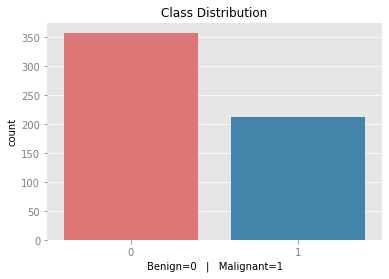

In [16]:
# Viewing number of patients within each class
sns.countplot(x=df['target'])
plt.title('Class Distribution')
plt.xlabel(labels);

We see that the classes are not balanced in the dataset. Note that the class we are most interested in is the '1' class, which tells us if a patient has a malignant tumor in their breast.

In [17]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [18]:
# Viewing the correlation between target and feature columns
pd.DataFrame(df.corr()['target']).sort_values(by='target',ascending=False).\
style.background_gradient(cmap='twilight')

,target
target,1
worst concave points,0.793566
worst perimeter,0.782914
mean concave points,0.776614
worst radius,0.776454
mean perimeter,0.742636
worst area,0.733825
mean radius,0.730029
mean area,0.708984
mean concavity,0.69636


### Creating train and test sets

In [19]:
X = df.drop(columns='target')
y = df['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Creating a baseline model

In [21]:
# Creating and fitting our dummy classifier
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)

# Creating our y_pred variable
y_pred = dummy.predict(X_test)

# Printing out the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.62      0.61        89
           1       0.36      0.35      0.36        54

    accuracy                           0.52       143
   macro avg       0.48      0.48      0.48       143
weighted avg       0.52      0.52      0.52       143



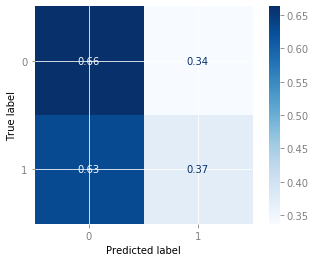

In [22]:
plot_confusion_matrix(dummy, X_test, y_test, normalize='true', cmap='Blues')

## Creating a GridSearch

In [23]:
# Creating our class weights dictionary
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), 
                                                  y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Our class weights:\n{class_weights_dict}")

Our class weights:
{0: 0.7947761194029851, 1: 1.3481012658227849}


In [24]:
class_weights

array([0.79477612, 1.34810127])

### Defining hyperparameter grid

In [25]:
params = {'n_estimators': [10, 25, 50, 100, 200], 
          'criterion': ['gini', 'entropy'], 
          'max_depth': [3, 5, 10, 15, 20, 25, None], 
          'min_samples_leaf': [1, 2, 5, 10]}

In [26]:
forest = RandomForestClassifier(class_weight=class_weights_dict)

In [27]:
clf = GridSearchCV(estimator=forest, param_grid=params, scoring='recall', cv=5)

In [28]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.7947761194029851,
                                                            1: 1.3481012658227849}),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15, 20, 25, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'n_estimators': [10, 25, 50, 100, 200]},
             scoring='recall')

In [29]:
best_params = clf.best_params_

In [30]:
best_params

{'criterion': 'gini',
 'max_depth': 25,
 'min_samples_leaf': 5,
 'n_estimators': 25}

In [31]:
best_forest = RandomForestClassifier(**best_params, class_weight=class_weights_dict)

In [37]:
best_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {0: 0.7947761194029851, 1: 1.3481012658227849},
 'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 25,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [32]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Definition:
    fits model on the training set and evaluates the model on the testing set.
    Prints out classification report along with a confusion matrix.
    
    Args:
    model: Required. A model to evaluate.
    X_train: Required. Features of the training set
    y_train: Required. Labels of the training set
    X_test: Required. Features of the testing set
    y_test: Required. Labels of the testing set
    
    Returns:
    A Classification report and confustion matrix of model evaluation on the test
    set.    
    """
    
    fit_model = model.fit(X_train, y_train)
    # creating y_pred values for train and test sets
    y_hat_test = fit_model.predict(X_test)
    y_hat_train = fit_model.predict(X_train)
    # comparing accuracy and recall score s of the train and test sets
    print(f"Train recall score: {metrics.recall_score(y_train, y_hat_train, average='weighted')}")
    print(f"Test recall score: {metrics.recall_score(y_test, y_hat_test, average='weighted')}")
    
    # printing out classification report and plotting confusion matrix
    print("\nClassification Report")
    print('---' * 8)
    print(classification_report(y_test, y_hat_test))
    plot_confusion_matrix(fit_model, X_test,y_test,normalize='true',cmap='Reds')
    
    # Plot Roc Curve on second ax
    roc_plot = plot_roc_curve(fit_model, X_test, y_test)
    plt.legend()
    # Threshold line
    plt.plot([0,1],[0,1],ls=':')
    plt.title('ROC Curve')
    plt.show()

Train recall score: 0.971830985915493
Test recall score: 0.972027972027972

Classification Report
------------------------
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        89
           1       0.95      0.98      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



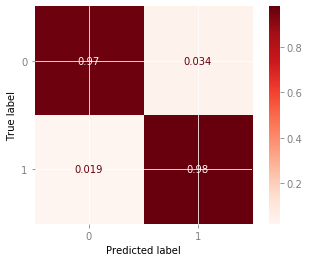

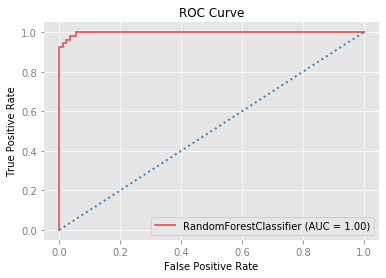

In [54]:
evaluate_model(best_forest, X_train, y_train, X_test, y_test)